In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fastparquet
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Loan_performance').getOrCreate()
from pyspark.sql.types import *

schema = StructType([
    StructField("POOL_ID", StringType(), True),
    StructField("LOAN_ID", StringType(), True),
    StructField("ACT_PERIOD", StringType(), True),
    StructField("CHANNEL", StringType(), True),
    StructField("SELLER", StringType(), True),
    StructField("SERVICER", StringType(), True),
    StructField("MASTER_SERVICER", StringType(), True),
    StructField("ORIG_RATE", DoubleType(), True),
    StructField("CURR_RATE", DoubleType(), True),
    StructField("ORIG_UPB", DoubleType(), True),
    StructField("ISSUANCE_UPB", DoubleType(), True),
    StructField("CURRENT_UPB", DoubleType(), True),
    StructField("ORIG_TERM", DoubleType(), True),
    StructField("ORIG_DATE", StringType(), True),
    StructField("FIRST_PAY", StringType(), True),
    StructField("LOAN_AGE", DoubleType(), True),
    StructField("REM_MONTHS", DoubleType(), True),
    StructField("ADJ_REM_MONTHS", DoubleType(), True),
    StructField("MATR_DT", StringType(), True),
    StructField("OLTV", DoubleType(), True),
    StructField("OCLTV", DoubleType(), True),
    StructField("NUM_BO", StringType(), True),
    StructField("DTI", DoubleType(), True),
    StructField("CSCORE_B", DoubleType(), True),
    StructField("CSCORE_C", DoubleType(), True),
    StructField("FIRST_FLAG", StringType(), True),
    StructField("PURPOSE", StringType(), True),
    StructField("PROP", StringType(), True),
    StructField("NO_UNITS", DoubleType(), True),
    StructField("OCC_STAT", StringType(), True),
    StructField("STATE", StringType(), True),
    StructField("MSA", StringType(), True),
    StructField("ZIP", StringType(), True),
    StructField("MI_PCT", DoubleType(), True),
    StructField("PRODUCT", StringType(), True),
    StructField("PPMT_FLG", StringType(), True),
    StructField("IO", StringType(), True),
    StructField("FIRST_PAY_IO", StringType(), True),
    StructField("MNTHS_TO_AMTZ_IO", StringType(), True),
    StructField("DLQ_STATUS", DoubleType(), True),
    StructField("PMT_HISTORY", StringType(), True),
    StructField("MOD_FLAG", StringType(), True),
    StructField("MI_CANCEL_FLAG", StringType(), True),
    StructField("Zero_Bal_Code", StringType(), True),
    StructField("ZB_DTE", StringType(), True),
    StructField("LAST_UPB", StringType(), True),
    StructField("RPRCH_DTE", StringType(), True),
    StructField("CURR_SCHD_PRNCPL", DoubleType(), True),
    StructField("TOT_SCHD_PRNCPL", DoubleType(), True),
    StructField("UNSCHD_PRNCPL_CURR", DoubleType(), True),
    StructField("LAST_PAID_INSTALLMENT_DATE", StringType(), True),
    StructField("FORECLOSURE_DATE", StringType(), True),
    StructField("DISPOSITION_DATE", StringType(), True),
    StructField("FORECLOSURE_COSTS", DoubleType(), True),
    StructField("PROPERTY_PRESERVATION_AND_REPAIR_COSTS", DoubleType(), True),
    StructField("ASSET_RECOVERY_COSTS", DoubleType(), True),
    StructField("MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS", DoubleType(), True),
    StructField("ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", DoubleType(), True),
    StructField("NET_SALES_PROCEEDS", DoubleType(), True),
    StructField("CREDIT_ENHANCEMENT_PROCEEDS", DoubleType(), True),
    StructField("REPURCHASES_MAKE_WHOLE_PROCEEDS", DoubleType(), True),
    StructField("OTHER_FORECLOSURE_PROCEEDS", DoubleType(), True),
    StructField("NON_INTEREST_BEARING_UPB", DoubleType(), True),
    StructField("PRINCIPAL_FORGIVENESS_AMOUNT", DoubleType(), True),
    StructField("ORIGINAL_LIST_START_DATE", StringType(), True),
    StructField("ORIGINAL_LIST_PRICE", DoubleType(), True),
    StructField("CURRENT_LIST_START_DATE", StringType(), True),
    StructField("CURRENT_LIST_PRICE", DoubleType(), True),
    StructField("ISSUE_SCOREB", DoubleType(), True),
    StructField("ISSUE_SCOREC", DoubleType(), True),
    StructField("CURR_SCOREB", DoubleType(), True),
    StructField("CURR_SCOREC", DoubleType(), True),
    StructField("MI_TYPE", StringType(), True),
    StructField("SERV_IND", DoubleType(), True),
    StructField("CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT", DoubleType(), True),
    StructField("CUMULATIVE_MODIFICATION_LOSS_AMOUNT", DoubleType(), True),
    StructField("CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS", DoubleType(), True),
    StructField("CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", DoubleType(), True),
    StructField("HOMEREADY_PROGRAM_INDICATOR", StringType(), True),
    StructField("FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", DoubleType(), True),
    StructField("RELOCATION_MORTGAGE_INDICATOR", StringType(), True),
    StructField("ZERO_BALANCE_CODE_CHANGE_DATE", StringType(), True),
    StructField("LOAN_HOLDBACK_INDICATOR", StringType(), True),
    StructField("LOAN_HOLDBACK_EFFECTIVE_DATE", StringType(), True),
    StructField("DELINQUENT_ACCRUED_INTEREST", DoubleType(), True),
    StructField("PROPERTY_INSPECTION_WAIVER_INDICATOR", StringType(), True),
    StructField("HIGH_BALANCE_LOAN_INDICATOR", StringType(), True),
    StructField("ARM_5_YR_INDICATOR", StringType(), True),
    StructField("ARM_PRODUCT_TYPE", StringType(), True),
    StructField("MONTHS_UNTIL_FIRST_PAYMENT_RESET", DoubleType(), True),
    StructField("MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET", DoubleType(), True),
    StructField("INTEREST_RATE_CHANGE_DATE", StringType(), True),
    StructField("PAYMENT_CHANGE_DATE", StringType(), True),
    StructField("ARM_INDEX", StringType(), True),
    StructField("ARM_CAP_STRUCTURE", StringType(), True),
    StructField("INITIAL_INTEREST_RATE_CAP", DoubleType(), True),
    StructField("PERIODIC_INTEREST_RATE_CAP", DoubleType(), True),
    StructField("LIFETIME_INTEREST_RATE_CAP", DoubleType(), True),
    StructField("MARGIN", DoubleType(), True),
    StructField("BALLOON_INDICATOR", StringType(), True),
    StructField("PLAN_NUMBER", StringType(), True),
    StructField("FORBEARANCE_INDICATOR", StringType(), True),
    StructField("HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR", StringType(), True),
    StructField("DEAL_NAME", StringType(), True),
    StructField("RE_PROCS_FLAG", StringType(), True),
    StructField("ADR_TYPE", StringType(), True),
    StructField("ADR_COUNT", DoubleType(), True),
    StructField("ADR_UPB", DoubleType(), True),
    StructField("PAYMENT_DEFERRAL_MOD_EVENT_FLAG", StringType(), True),
    StructField("INTEREST_BEARING_UPB", DoubleType(), True)
])


In [10]:
!pip install pyspark

In [9]:
import os
folder_path = '/content/drive/MyDrive/Big_data'

files = os.listdir(folder_path)
print("Files in the folder:")
for file in files:
    print(file)

Files in the folder:
2006Q1.csv
2006Q2.csv
2006Q3.csv
2007Q4.csv
2007Q1.csv
2007Q2.csv
2007Q3.csv
2006Q4.csv
combined.parquet
parquet_final.parquet
parquet_2
parquet_3


In [ ]:
files = os.listdir(folder_path)
print("Files in the folder:")
for file in files:
    print(file)

Files in the folder:
2006Q1.csv
2006Q2.csv
2006Q3.csv
2007Q4.csv
2007Q1.csv
2007Q2.csv
2007Q3.csv
2006Q4.csv
combined.parquet


In [ ]:
import os
from pyspark.sql import SparkSession


folder_path = '/content/drive/MyDrive/Big_data'


csv_path = os.path.join(folder_path, '*.csv')
df = spark.read.csv(
    csv_path,
    sep='|',
    schema=schema,
    header=False,
    enforceSchema=True
)


df.printSchema()
df.show(50, truncate=False)


combined_file = os.path.join(folder_path, 'combined.parquet')
df.write.parquet(
    path=combined_file,
    mode="overwrite",
    compression="snappy"
)

df_parquet = spark.read.parquet(combined_file)


print(f"Parquet file contains {df_parquet.count()} records")
df_parquet.show(10)


root
 |-- POOL_ID: string (nullable = true)
 |-- LOAN_ID: string (nullable = true)
 |-- ACT_PERIOD: string (nullable = true)
 |-- CHANNEL: string (nullable = true)
 |-- SELLER: string (nullable = true)
 |-- SERVICER: string (nullable = true)
 |-- MASTER_SERVICER: string (nullable = true)
 |-- ORIG_RATE: double (nullable = true)
 |-- CURR_RATE: double (nullable = true)
 |-- ORIG_UPB: double (nullable = true)
 |-- ISSUANCE_UPB: double (nullable = true)
 |-- CURRENT_UPB: double (nullable = true)
 |-- ORIG_TERM: double (nullable = true)
 |-- ORIG_DATE: string (nullable = true)
 |-- FIRST_PAY: string (nullable = true)
 |-- LOAN_AGE: double (nullable = true)
 |-- REM_MONTHS: double (nullable = true)
 |-- ADJ_REM_MONTHS: double (nullable = true)
 |-- MATR_DT: string (nullable = true)
 |-- OLTV: double (nullable = true)
 |-- OCLTV: double (nullable = true)
 |-- NUM_BO: string (nullable = true)
 |-- DTI: double (nullable = true)
 |-- CSCORE_B: double (nullable = true)
 |-- CSCORE_C: double (nul

- **Filter the selected columns into a separate Parquet file...**

In [8]:
!pip install fastparquet

import os
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("ParquetExample").getOrCreate()

folder_path = "/content/drive/MyDrive/Big_data"

combined_file = os.path.join(folder_path, "combined.parquet")
df_parquet = spark.read.parquet(combined_file)

selected_columns = [
    "LOAN_ID",
    "ACT_PERIOD",
    "ORIG_DATE",
    "ORIG_RATE",
    "ORIG_UPB",
    "CURRENT_UPB",
    "CSCORE_B",
    "OLTV",
    "STATE",
    "FIRST_FLAG",
    "OCC_STAT",
    "Zero_Bal_Code",
    "DLQ_STATUS",
    "CURRENT_LIST_PRICE",
    "NET_SALES_PROCEEDS",
    "CREDIT_ENHANCEMENT_PROCEEDS",
    "REPURCHASES_MAKE_WHOLE_PROCEEDS",
    "OTHER_FORECLOSURE_PROCEEDS",
    "PROP",
    "DTI",
    "ZIP"
]

df_selected = df_parquet.select(selected_columns)

parquet_final = os.path.join(folder_path, "parquet_final.parquet")
df_selected.write.parquet(
    path=parquet_final,
    mode="overwrite",
    compression="snappy"
)

df_final = spark.read.parquet(parquet_final)
print(f"Parquet file '{parquet_final}' contains {df_final.count()} records")
df_final.show(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00
Parquet file '/content/drive/MyDrive/Big_data/parquet_final.parquet' contains 147271768 records
+------------+----------+---------+---------+--------+-----------+--------+----+-----+----------+--------+-------------+----------+------------------+------------------+---------------------------+-------------------------------+--------------------------+----+----+---+
|     LOAN_ID|ACT_PERIOD|ORIG_DATE|ORIG_RATE|ORIG_UPB|CURRENT_UPB|CSCORE_B|OLTV|STATE|FIRST_FLAG|OCC_STAT|Zero_Bal_Code|DLQ_STATUS|CURRENT_LIST_PRICE|NET_SALES_PROCEEDS|CREDIT_ENHANCEMENT_PROCEEDS|REPURCHASES_MAKE_WHOLE_PROCEEDS|OTHER_FORECLOSURE_PROCEEDS|PROP| DTI|ZIP|
+------------+----------+---------+---------+--------+-----------+--------+----+-----+----------+--------+-------------+----------+------------------+------------------+---------------------------+-------------------------------+--------------------------+----+----+---+
|570764433995|

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

import os
from google.colab import drive

drive.mount('/content/drive')

spark = SparkSession.builder.appName("BigDataProcessing").getOrCreate()

folder_path = "/content/drive/MyDrive/Big_data"
parquet_file = os.path.join(folder_path, "parquet_final.parquet")

df_final = spark.read.parquet(parquet_file)

df_final.printSchema()
df_final.show(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
root
 |-- LOAN_ID: string (nullable = true)
 |-- ACT_PERIOD: string (nullable = true)
 |-- ORIG_DATE: string (nullable = true)
 |-- ORIG_RATE: double (nullable = true)
 |-- ORIG_UPB: double (nullable = true)
 |-- CURRENT_UPB: double (nullable = true)
 |-- CSCORE_B: double (nullable = true)
 |-- OLTV: double (nullable = true)
 |-- STATE: string (nullable = true)
 |-- FIRST_FLAG: string (nullable = true)
 |-- OCC_STAT: string (nullable = true)
 |-- Zero_Bal_Code: string (nullable = true)
 |-- DLQ_STATUS: double (nullable = true)
 |-- CURRENT_LIST_PRICE: double (nullable = true)
 |-- NET_SALES_PROCEEDS: double (nullable = true)
 |-- CREDIT_ENHANCEMENT_PROCEEDS: double (nullable = true)
 |-- REPURCHASES_MAKE_WHOLE_PROCEEDS: double (nullable = true)
 |-- OTHER_FORECLOSURE_PROCEEDS: double (nullable = true)
 |-- PROP: string (nullable = true)
 |-- DTI: double (null

In [17]:
from pyspark.sql.functions import col

defaulted_loans = df_final.filter(col("Zero_Bal_Code").isin(["03", "09", "15", "98"]))
defaulted_loans.select("NET_SALES_PROCEEDS", "CREDIT_ENHANCEMENT_PROCEEDS").show(5)

+------------------+---------------------------+
|NET_SALES_PROCEEDS|CREDIT_ENHANCEMENT_PROCEEDS|
+------------------+---------------------------+
|         187755.86|                        0.0|
|          38647.01|                   43656.23|
|         113806.19|                        0.0|
|         134326.16|                       NULL|
|          18958.81|                        0.0|
+------------------+---------------------------+
only showing top 5 rows



In [18]:
from pyspark.sql.functions import col, count, when

total_rows = df_final.count()
null_zero_bal = df_final.filter(col("Zero_Bal_Code").isNull()).count()
null_percent = (null_zero_bal / total_rows) * 100
print(f"% of NULLs in Zero_Bal_Code: {null_percent:.2f}%")

critical_columns = ["CSCORE_B", "OLTV", "ORIG_UPB", "DLQ_STATUS"]
for c in critical_columns:
    null_count = df_final.filter(col(c).isNull()).count()
    print(f"Column {c}: {null_count} NULLs ({null_count / total_rows * 100:.2f}%)")

% of NULLs in Zero_Bal_Code: 98.46%
Column CSCORE_B: 458463 NULLs (0.31%)
Column OLTV: 0 NULLs (0.00%)
Column ORIG_UPB: 0 NULLs (0.00%)
Column DLQ_STATUS: 2169280 NULLs (1.47%)


In [19]:
from pyspark.sql.functions import col, count, when

total_rows = df_final.count()

null_percentages = []
for column in df_final.columns:
    null_count = df_final.filter(col(column).isNull()).count()
    percent_null = (null_count / total_rows) * 100
    null_percentages.append((column, percent_null))

print("+----------------------+------------------+")
print("| Column               | % NULL Values    |")
print("+----------------------+------------------+")
for col_name, percent in null_percentages:
    print(f"| {col_name.ljust(20)} | {percent:.2f}%         |")
print("+----------------------+------------------+")

+----------------------+------------------+
| Column               | % NULL Values    |
+----------------------+------------------+
| LOAN_ID              | 0.00%         |
| ACT_PERIOD           | 0.00%         |
| ORIG_DATE            | 0.00%         |
| ORIG_RATE            | 0.00%         |
| ORIG_UPB             | 0.00%         |
| CURRENT_UPB          | 0.00%         |
| CSCORE_B             | 0.31%         |
| OLTV                 | 0.00%         |
| STATE                | 0.00%         |
| FIRST_FLAG           | 0.12%         |
| OCC_STAT             | 0.00%         |
| Zero_Bal_Code        | 98.46%         |
| DLQ_STATUS           | 1.47%         |
| CURRENT_LIST_PRICE   | 100.00%         |
| NET_SALES_PROCEEDS   | 99.87%         |
| CREDIT_ENHANCEMENT_PROCEEDS | 99.91%         |
| REPURCHASES_MAKE_WHOLE_PROCEEDS | 99.91%         |
| OTHER_FORECLOSURE_PROCEEDS | 99.89%         |
| PROP                 | 0.00%         |
| DTI                  | 2.82%         |
| ZIP            

In [12]:

median_fico = df_final.approxQuantile("CSCORE_B", [0.5], 0.01)[0]
df_clean = df_final.fillna(median_fico, subset=["CSCORE_B"])

df_clean = df_clean.fillna("N", subset=["FIRST_FLAG"])

df_clean = df_clean.fillna(0.0, subset=["DLQ_STATUS"])

median_dti = df_clean.approxQuantile("DTI", [0.5], 0.01)[0]
df_clean = df_clean.fillna(median_dti, subset=["DTI"])

df_clean = df_clean.drop("CURRENT_LIST_PRICE")

recovery_cols = ["NET_SALES_PROCEEDS", "CREDIT_ENHANCEMENT_PROCEEDS",
                 "REPURCHASES_MAKE_WHOLE_PROCEEDS", "OTHER_FORECLOSURE_PROCEEDS"]
df_clean = df_clean.fillna(0, subset=recovery_cols)

LOAN_ID: 0 NULLs
ACT_PERIOD: 0 NULLs
ORIG_DATE: 0 NULLs
ORIG_RATE: 45 NULLs
ORIG_UPB: 0 NULLs
CURRENT_UPB: 0 NULLs
CSCORE_B: 0 NULLs
OLTV: 0 NULLs
STATE: 0 NULLs
FIRST_FLAG: 0 NULLs
OCC_STAT: 0 NULLs
Zero_Bal_Code: 145007514 NULLs
DLQ_STATUS: 0 NULLs
NET_SALES_PROCEEDS: 0 NULLs
CREDIT_ENHANCEMENT_PROCEEDS: 0 NULLs
REPURCHASES_MAKE_WHOLE_PROCEEDS: 0 NULLs
OTHER_FORECLOSURE_PROCEEDS: 0 NULLs
PROP: 0 NULLs
DTI: 0 NULLs
ZIP: 125 NULLs


In [21]:
df_clean = df_clean.filter(col("ORIG_RATE").isNotNull())
df_clean = df_clean.filter(col("ZIP").isNotNull())

In [22]:
for column in df_clean.columns:
    null_count = df_clean.filter(col(column).isNull()).count()
    print(f"{column}: {null_count} NULLs")

LOAN_ID: 0 NULLs
ACT_PERIOD: 0 NULLs
ORIG_DATE: 0 NULLs
ORIG_RATE: 0 NULLs
ORIG_UPB: 0 NULLs
CURRENT_UPB: 0 NULLs
CSCORE_B: 0 NULLs
OLTV: 0 NULLs
STATE: 0 NULLs
FIRST_FLAG: 0 NULLs
OCC_STAT: 0 NULLs
Zero_Bal_Code: 145007346 NULLs
DLQ_STATUS: 0 NULLs
NET_SALES_PROCEEDS: 0 NULLs
CREDIT_ENHANCEMENT_PROCEEDS: 0 NULLs
REPURCHASES_MAKE_WHOLE_PROCEEDS: 0 NULLs
OTHER_FORECLOSURE_PROCEEDS: 0 NULLs
PROP: 0 NULLs
DTI: 0 NULLs
ZIP: 0 NULLs


**Analysis**







**Analysis-1**

  **Average FICO Across 2 Years ( 2006 & 2007)**


*   Q1) *Compare the average FICO across the two years.*

    compare the average FICO scores across two years using columns :
    1) Date Columns
    2) FICO Columns
          1.   Borrower Credit Score at Origination
 - *project focuses on 2006–2007.*
 - *Add a filter to exclude years outside 2006–2007*
 - *Co- borrower has a lot of  (CSCORE_C) NULLs so , results may be skewed by adding CSCORE_C to into it, so I just choose borrower Credit score. only on borrower FICO (CSCORE_B), which is safer.*








In [26]:
from pyspark.sql.functions import year, avg, to_date, col

df_clean = df_clean.withColumn(
    "OriginationYear",
    year(to_date(col("ORIG_DATE").cast("string"), "MMyyyy"))
).filter((col("OriginationYear") == 2006) | (col("OriginationYear") == 2007))

avg_fico_by_year = df_clean.groupBy("OriginationYear") \
    .agg(avg("CSCORE_B").alias("AvgFICO")) \
    .orderBy("OriginationYear")

avg_fico_by_year.show()

+---------------+-----------------+
|OriginationYear|          AvgFICO|
+---------------+-----------------+
|           2006|715.0888599618581|
|           2007|710.4113213790145|
+---------------+-----------------+



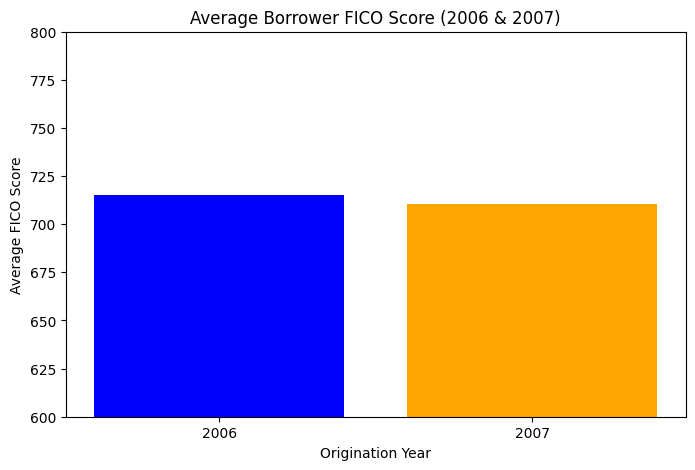

In [34]:
import matplotlib.pyplot as plt

avg_fico_pandas = avg_fico_by_year.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(avg_fico_pandas["OriginationYear"], avg_fico_pandas["AvgFICO"], color=['blue', 'orange'])
plt.xlabel("Origination Year")
plt.ylabel("Average FICO Score")
plt.title("Average Borrower FICO Score (2006 & 2007)")
plt.xticks(avg_fico_pandas["OriginationYear"])
plt.ylim(600, 800)

plt.show()


**Analysis-2**
**Monthly delinquency rates for 30, 60 and 90 days and how they vary by loan term**



*2).   The monthly delinquency rates for 30, 60 and 90 days past due and how   they vary by loan term*



*   The monthly delinquency rates for accounts that are 30, 60, and 90 days overdue.
*    An analysis of how delinquency rates differ based on loan terms


**Analysis A -**
          The monthly delinquency rates for accounts that are 30, 60, and 90 days overdue.


          Columns used in

              1.   Monthly Reporting Period (formatted as MMYYYY)

              2.  Current Loan Delinquency Status










In [32]:
from pyspark.sql.functions import col, count, when, substring, lit

# Filter data for 2006–2007 , beacuse we are just focusing on the dataset 2006 and 2007.
df_filtered = df_clean.filter((substring(col("ACT_PERIOD"), 3, 4).isin(["2006", "2007"])))


delinquency_monthly = df_filtered.groupBy("ACT_PERIOD") \
    .agg(
        count(when(col("DLQ_STATUS") == "01", True)).alias("30_Days_DPD"),
        count(when(col("DLQ_STATUS") == "02", True)).alias("60_Days_DPD"),
        count(when(col("DLQ_STATUS") == "03", True)).alias("90+_Days_DPD"),
        count("*").alias("total_loans")
    ) \
    .orderBy("ACT_PERIOD")

delinquency_formatted = delinquency_monthly.select(
    col("ACT_PERIOD").alias("month"),
    lit("30 Days").alias("delinquency_category"),
    col("30_Days_DPD").alias("delinquent_count"),
    col("total_loans")
).unionAll(
    delinquency_monthly.select(
        col("ACT_PERIOD").alias("month"),
        lit("60 Days"),
        col("60_Days_DPD"),
        col("total_loans")
    )
).unionAll(
    delinquency_monthly.select(
        col("ACT_PERIOD").alias("month"),
        lit("90+ Days"),
        col("90+_Days_DPD"),
        col("total_loans")
    )
).withColumn(
    "delinquency_rate",
    (col("delinquent_count") / col("total_loans")) * 100
)

delinquency_formatted.show()

+------+--------------------+----------------+-----------+--------------------+
| month|delinquency_category|delinquent_count|total_loans|    delinquency_rate|
+------+--------------------+----------------+-----------+--------------------+
|012006|             30 Days|               0|       3960|                 0.0|
|012007|             30 Days|            9787|     992326|  0.9862686254315618|
|022006|             30 Days|               6|      40023|0.014991379956524997|
|022007|             30 Days|           12395|    1070571|   1.157793364475593|
|032006|             30 Days|             281|     109289|  0.2571164527079578|
|032007|             30 Days|           10401|    1153084|  0.9020158115106967|
|042006|             30 Days|             895|     201274| 0.44466746822739145|
|042007|             30 Days|           12179|    1228279|  0.9915499654394483|
|052006|             30 Days|            1417|     294974|  0.4803813217436113|
|052007|             30 Days|           

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, count, when, substring, lit
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df_clean.filter(substring(col("ACT_PERIOD"), 3, 4).isin(["2006", "2007"]))

delinquency_monthly = df_filtered.groupBy("ACT_PERIOD") \
    .agg(
        count(when(col("DLQ_STATUS") == "01", True)).alias("30_Days_DPD"),
        count(when(col("DLQ_STATUS") == "02", True)).alias("60_Days_DPD"),
        count(when(col("DLQ_STATUS") == "03", True)).alias("90+_Days_DPD"),
        count("*").alias("total_loans")
    ) \
    .orderBy("ACT_PERIOD")

delinquency_formatted = delinquency_monthly.select(
    col("ACT_PERIOD").alias("month"),
    lit("30 Days").alias("delinquency_category"),
    col("30_Days_DPD").alias("delinquent_count"),
    col("total_loans")
).unionAll(
    delinquency_monthly.select(
        col("ACT_PERIOD").alias("month"),
        lit("60 Days"),
        col("60_Days_DPD"),
        col("total_loans")
    )
).unionAll(
    delinquency_monthly.select(
        col("ACT_PERIOD").alias("month"),
        lit("90+ Days"),
        col("90+_Days_DPD"),
        col("total_loans")
    )
).withColumn(
    "delinquency_rate",
    (col("delinquent_count") / col("total_loans")) * 100
)

print("First 10 rows:")
delinquency_formatted.orderBy("month").limit(10).show()

print("\nLast 10 rows:")
delinquency_formatted.orderBy(col("month").desc()).limit(10).show()


First 10 rows:
+------+--------------------+----------------+-----------+--------------------+
| month|delinquency_category|delinquent_count|total_loans|    delinquency_rate|
+------+--------------------+----------------+-----------+--------------------+
|012006|             60 Days|               1|      86051|0.001162101544432...|
|012006|            90+ Days|               0|      86051|                 0.0|
|012006|             30 Days|             222|      86051| 0.25798654286411543|
|012007|            90+ Days|             624|    1129752|0.055233360950013806|
|012007|             60 Days|            1750|    1129752| 0.15490125266430155|
|012007|             30 Days|           11625|    1129752|  1.0289868926985746|
|022006|            90+ Days|               0|     162739|                 0.0|
|022006|             60 Days|              28|     162739| 0.01720546396377021|
|022006|             30 Days|            1115|     162739|  0.6851461542715637|
|022007|            90+ D

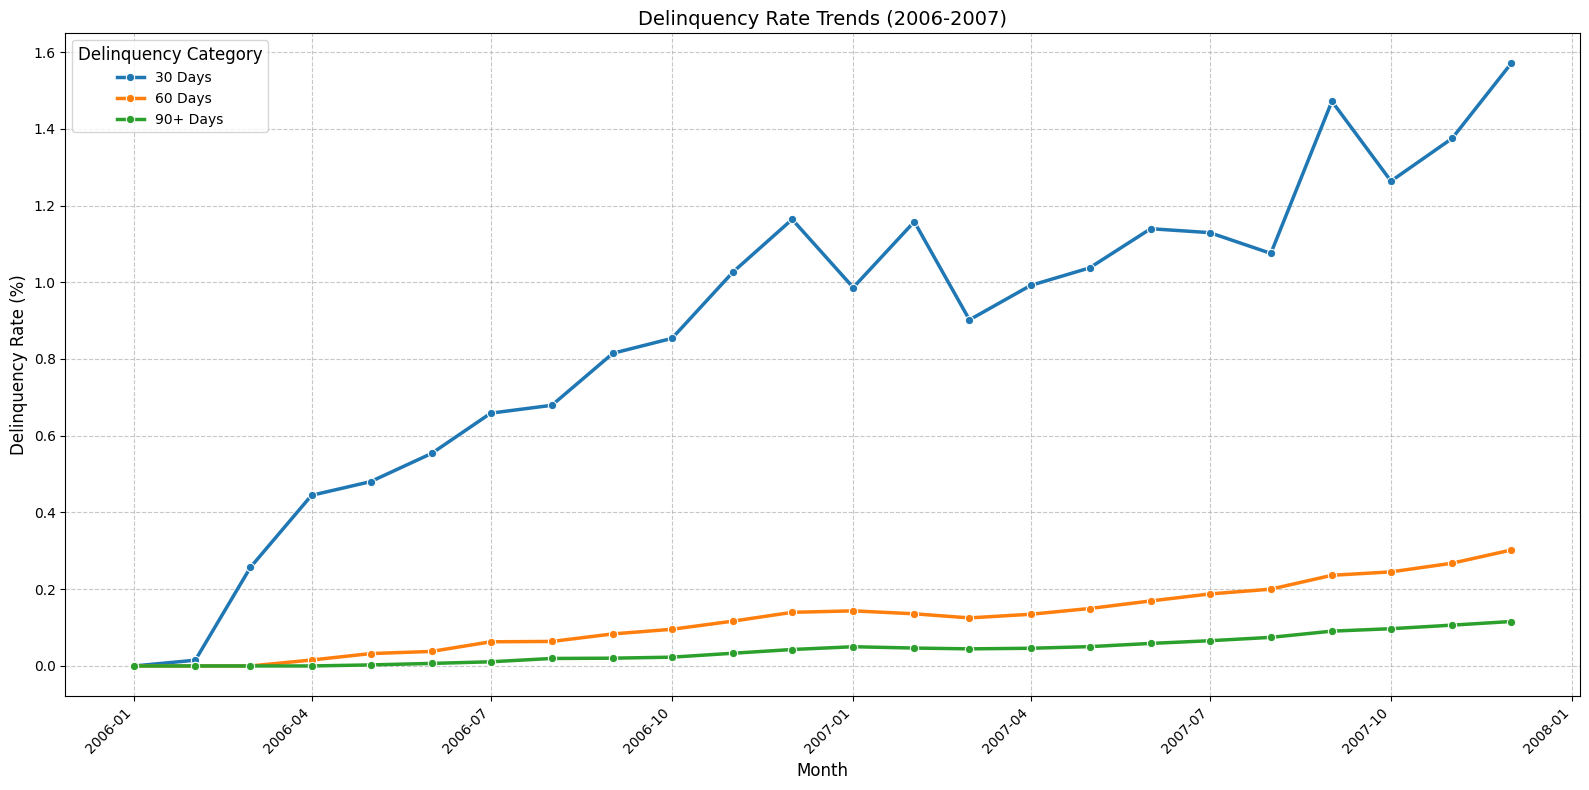

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



delinquency_pd = delinquency_formatted.toPandas()
delinquency_pd["month"] = pd.to_datetime(delinquency_pd["month"], format="%m%Y")

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=delinquency_pd,
    x="month",
    y="delinquency_rate",
    hue="delinquency_category",
    marker="o",
    linewidth=2.5
)
plt.title("Delinquency Rate Trends (2006-2007)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Delinquency Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Delinquency Category", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

**Analysis 2b: Delinquency Rates by Loan Term**

This analysis will focus on how delinquency rates vary according to the Original Loan Term( Original Loan Term) field , rather than examining these rates on a month or year basis. The Original Loan Term is measured in months and will be categorized into the following yearly buckets:

- Under 10 years (less than 120 months)
- 10 to 14 years (120 to 179 months)
- 15 to 19 years (180 to 239 months)
- 20 to 24 years (240 to 299 months)
- 25 to 29 years (300 to 359 months)
- 30 years (360 months and more )

In [50]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ReadParquet") \
    .getOrCreate()

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Big_data/combined.parquet"
df = spark.read.parquet(file_path)

if "ORIG_TERM" in df.columns:
    df.select("ORIG_TERM").show()
else:
    print("Column 'ORIG_TERM' not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+---------+
|ORIG_TERM|
+---------+
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
|    360.0|
+---------+
only showing top 20 rows



In [61]:
original_df.printSchema()

root
 |-- POOL_ID: string (nullable = true)
 |-- LOAN_ID: string (nullable = true)
 |-- ACT_PERIOD: string (nullable = true)
 |-- CHANNEL: string (nullable = true)
 |-- SELLER: string (nullable = true)
 |-- SERVICER: string (nullable = true)
 |-- MASTER_SERVICER: string (nullable = true)
 |-- ORIG_RATE: double (nullable = true)
 |-- CURR_RATE: double (nullable = true)
 |-- ORIG_UPB: double (nullable = true)
 |-- ISSUANCE_UPB: double (nullable = true)
 |-- CURRENT_UPB: double (nullable = true)
 |-- ORIG_TERM: double (nullable = true)
 |-- ORIG_DATE: string (nullable = true)
 |-- FIRST_PAY: string (nullable = true)
 |-- LOAN_AGE: double (nullable = true)
 |-- REM_MONTHS: double (nullable = true)
 |-- ADJ_REM_MONTHS: double (nullable = true)
 |-- MATR_DT: string (nullable = true)
 |-- OLTV: double (nullable = true)
 |-- OCLTV: double (nullable = true)
 |-- NUM_BO: string (nullable = true)
 |-- DTI: double (nullable = true)
 |-- CSCORE_B: double (nullable = true)
 |-- CSCORE_C: double (nul

In [62]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("FilterColumns").getOrCreate()

original_df = spark.read.parquet("/content/drive/MyDrive/Big_data/combined.parquet")

required_columns = [
    "LOAN_ID", "ACT_PERIOD", "ORIG_DATE", "ORIG_RATE", "ORIG_UPB", "CURRENT_UPB",
    "CSCORE_B", "OLTV", "STATE", "FIRST_FLAG", "OCC_STAT", "Zero_Bal_Code",
    "DLQ_STATUS", "NET_SALES_PROCEEDS", "CREDIT_ENHANCEMENT_PROCEEDS",
    "REPURCHASES_MAKE_WHOLE_PROCEEDS", "OTHER_FORECLOSURE_PROCEEDS", "PROP", "DTI", "ZIP",
    "ORIG_TERM"
]

filtered_df = original_df.select(*required_columns)

filtered_df.write.parquet("/content/drive/MyDrive/Big_data/parquet_3", mode="overwrite")



Filtered dataset regenerated with UPB_AT_REMOVAL!


In [64]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count, sum as spark_sum

spark = SparkSession.builder.appName("DelinquencyByLoanTerm").getOrCreate()

filtered_df = spark.read.parquet("/content/drive/MyDrive/Big_data/parquet_3")



loan_term_buckets = [
    ("Under 10 years", 0, 119),
    ("10-14 years", 120, 179),
    ("15-19 years", 180, 239),
    ("20-24 years", 240, 299),
    ("25-29 years", 300, 359),
    ("30+ years", 360, 9999)
]

bucket_expr = when(col("ORIG_TERM").isNull(), "Unknown")
for label, min_m, max_m in loan_term_buckets:
    bucket_expr = bucket_expr.when(
        (col("ORIG_TERM") >= min_m) & (col("ORIG_TERM") <= max_m), label)

df_bucketed = filtered_df.withColumn("loan_term_bucket", bucket_expr)

delinquency_df = df_bucketed.groupBy("loan_term_bucket").agg(
    count("*").alias("total_loans"),
    spark_sum(when(col("DLQ_STATUS") == 1, 1).otherwise(0)).alias("30_Days"),
    spark_sum(when(col("DLQ_STATUS") == 2, 1).otherwise(0)).alias("60_Days"),
    spark_sum(when(col("DLQ_STATUS") == 3, 1).otherwise(0)).alias("90_Days")
)

final_df = delinquency_df.selectExpr(
    "loan_term_bucket",
    "total_loans",
    "stack(3, '30 Days', 30_Days, '60 Days', 60_Days, '90 Days', 90_Days) as (delinquency_category, delinquent_count)"
).withColumn("delinquency_rate", col("delinquent_count")/col("total_loans"))

final_df.orderBy("loan_term_bucket", "delinquency_category").show()



+----------------+-----------+--------------------+----------------+--------------------+
|loan_term_bucket|total_loans|delinquency_category|delinquent_count|    delinquency_rate|
+----------------+-----------+--------------------+----------------+--------------------+
|     10-14 years|    1880147|             30 Days|           30319|0.016125866754035722|
|     10-14 years|    1880147|             60 Days|            7696|0.004093296960290871|
|     10-14 years|    1880147|             90 Days|            2940|0.001563707518614236|
|     15-19 years|   15939823|             30 Days|          320915|  0.0201329086276554|
|     15-19 years|   15939823|             60 Days|           87673|0.005500249281312597|
|     15-19 years|   15939823|             90 Days|           40623|0.002548522652980...|
|     20-24 years|    6646383|             30 Days|          200241|0.030127815384698716|
|     20-24 years|    6646383|             60 Days|           57628|0.008670580675233432|
|     20-2

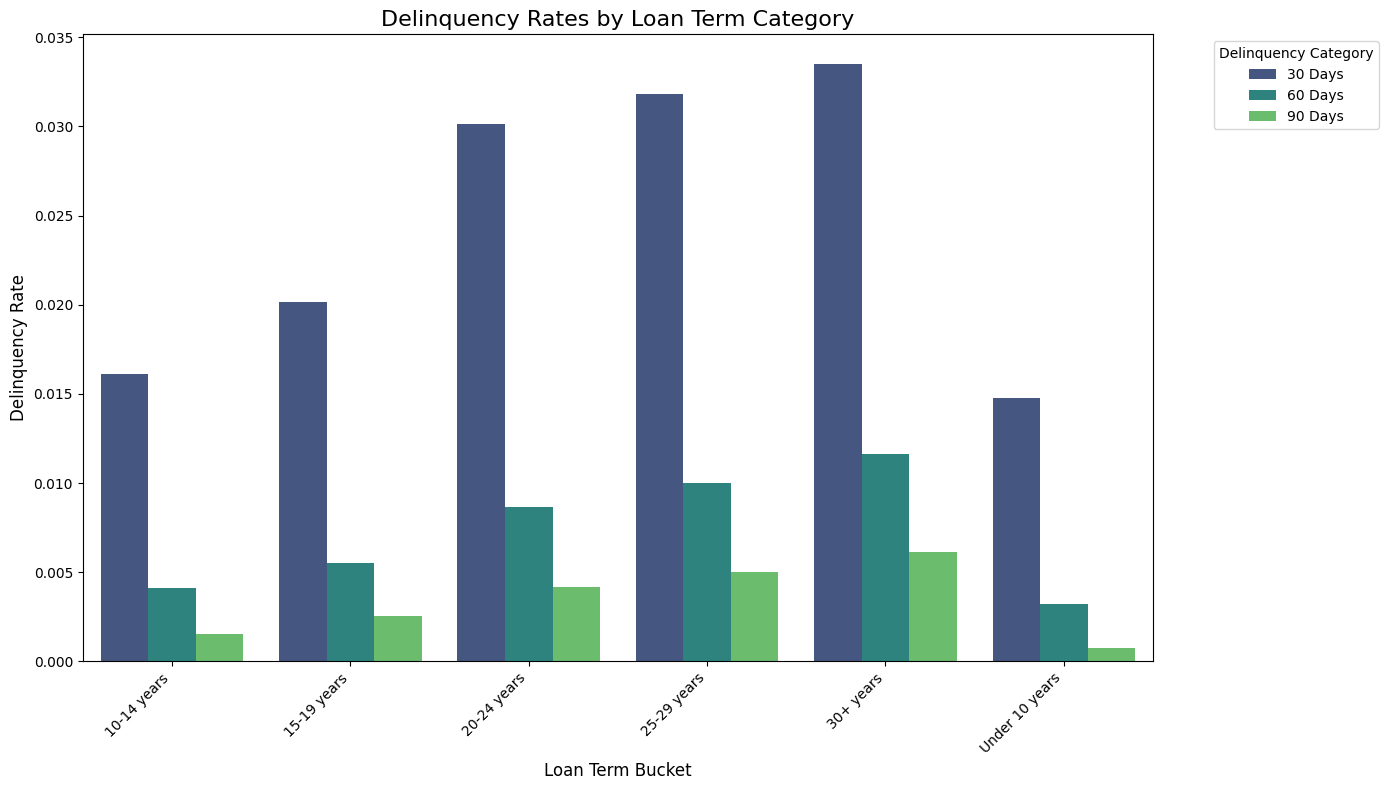

In [65]:
pdf = final_df.orderBy("loan_term_bucket", "delinquency_category").toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(
    x="loan_term_bucket",
    y="delinquency_rate",
    hue="delinquency_category",
    data=pdf,
    palette="viridis"
)

plt.title("Delinquency Rates by Loan Term Category", fontsize=16)
plt.xlabel("Loan Term Bucket", fontsize=12)
plt.ylabel("Delinquency Rate", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Delinquency Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis 3) -A bar chart showing credit scores with a mortgage per state for first-time buyers..**

3) Stacked bar chart illustrating the distribution of poor, fair, good, very good, and excellent credit scores among first-time homebuyers by state.

 FICO scores will be categorized into the following ranges:
- Poor: [300, 579]
- Fair: [580, 669]
- Good: [670, 739]
- Very Good: [740, 799]
- Excellent: [800, 850]



In [66]:
first_time_df = filtered_df.filter(col("FIRST_FLAG") == "Y")  # Assuming 'Y' indicates first-time buyer

credit_categories = [
    ("Poor", 300, 579),
    ("Fair", 580, 669),
    ("Good", 670, 739),
    ("Very Good", 740, 799),
    ("Excellent", 800, 850)
]

category_expr = when(col("CSCORE_B").isNull(), "Unknown")
for label, min_score, max_score in credit_categories:
    category_expr = category_expr.when(
        (col("CSCORE_B") >= min_score) & (col("CSCORE_B") <= max_score), label)

df_categorized = first_time_df.withColumn("credit_category", category_expr)

agg_df = df_categorized.groupBy("STATE", "credit_category") \
    .agg(count("*").alias("count")) \
    .orderBy("STATE")

pivot_df = agg_df.groupBy("STATE") \
    .pivot("credit_category", ["Poor", "Fair", "Good", "Very Good", "Excellent"]) \
    .agg(spark_sum("count")) \
    .orderBy("STATE")


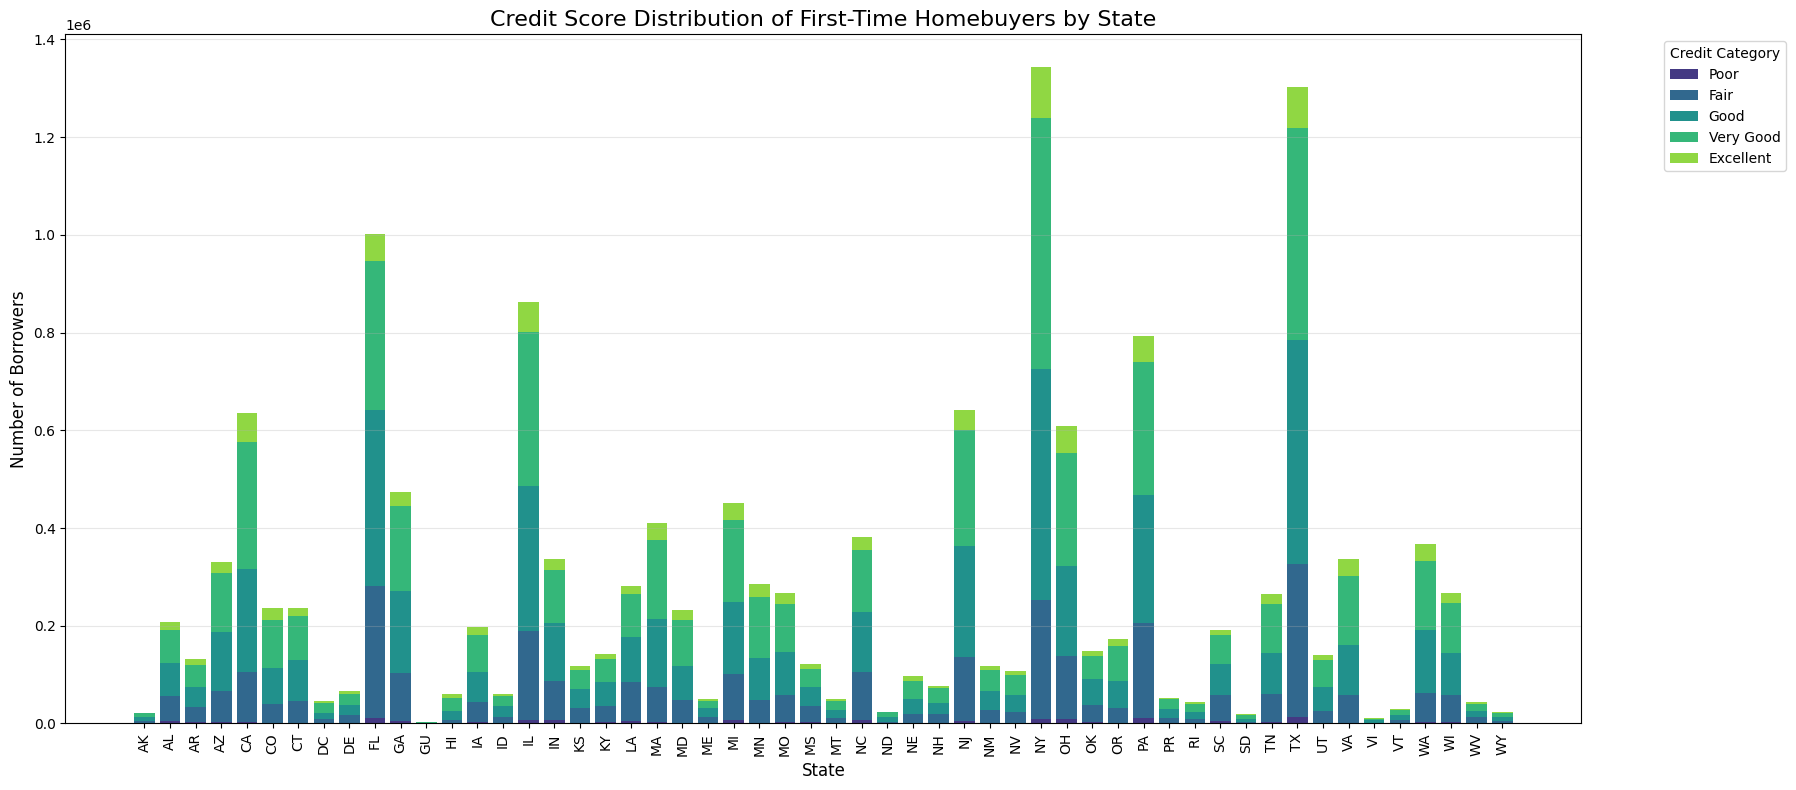

In [67]:

pdf = pivot_df.toPandas().fillna(0)

plt.figure(figsize=(18, 8))
categories = ["Poor", "Fair", "Good", "Very Good", "Excellent"]
colors = sns.color_palette("viridis", len(categories))

bottom = None
for idx, category in enumerate(categories):
    plt.bar(
        pdf["STATE"],
        pdf[category],
        label=category,
        color=colors[idx],
        bottom=bottom
    )
    if bottom is None:
        bottom = pdf[category].values
    else:
        bottom += pdf[category].values

plt.title("Credit Score Distribution of First-Time Homebuyers by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Borrowers", fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.legend(title="Credit Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis 4: Corr Btw FICO Score, LTV Ratio, Interest Rate, and Loan Status**


**4) Analyze correlations between the FICO Score, LTV Ratio, and Interest Rate with the loan status...**

We will examine the relationships between the FICO Score, LTV Ratio, and Interest Rate in relation to the Loan Status. The loan status is indicated by the Zero Balance Code listed below...

- 01 = Prepaid or Matured
- 02 = Third Party Sale
- 03 = Short Sale
- 06 = Repurchased
- 09 = Deed-in-Lieu; REO Disposition
- 15 = Non Performing Note Sale
- 16 = Reperforming Note Sale
- 96  = Removal (non-credit event) Applies to all CAS deals prior  to and including 2015-C03:
- 97 = Delinquency (credit event due to D180)
- 98 = Other Credit Event



In [68]:
credit_events = ["03", "09", "15", "97", "98"]

analysis_df = filtered_df.filter(col("Zero_Bal_Code").isNotNull()).withColumn(
    "Default_Flag",
    when(col("Zero_Bal_Code").isin(credit_events), 1).otherwise(0)
).select(
    "CSCORE_B",
    "OLTV",
    "ORIG_RATE",
    "Default_Flag"
).na.drop()


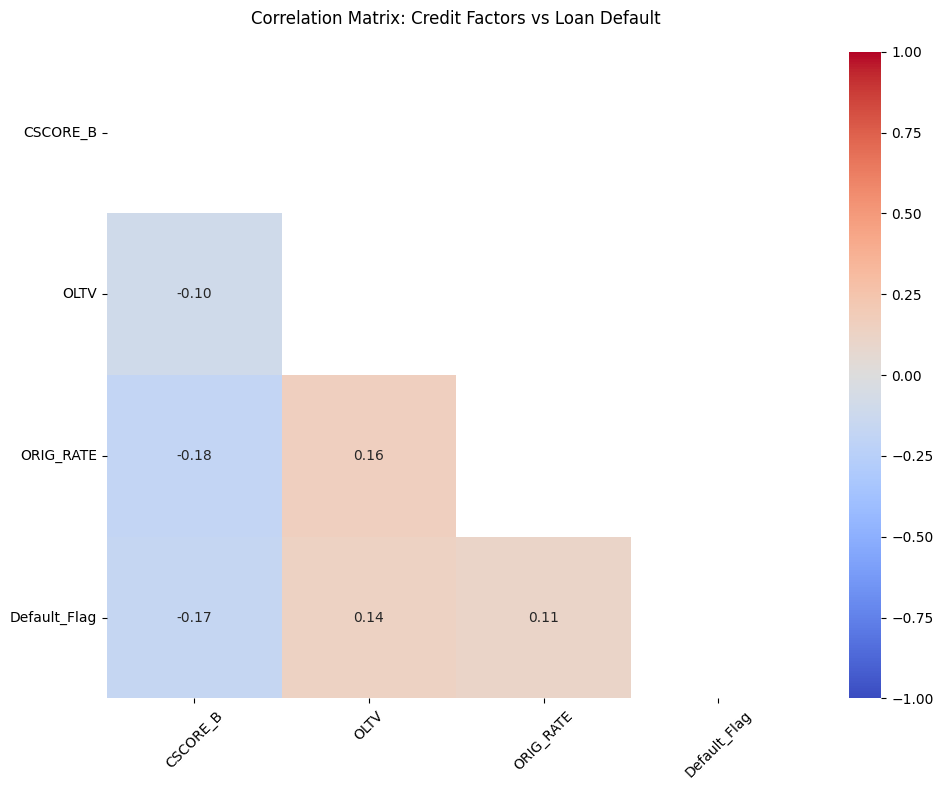

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pandas_df = analysis_df.toPandas()

corr_matrix = pandas_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    fmt=".2f",
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Correlation Matrix: Credit Factors vs Loan Default", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
from pyspark.sql.functions import col, expr, lit, create_map
zbc_mapping = create_map(
    *[i for x in [
        ("01", "Prepaid/Matured"),
        ("02", "Third Party Sale"),
        ("03", "Short Sale"),
        ("06", "Repurchased"),
        ("09", "Deed-in-Lieu/REO"),
        ("15", "NonPerforming Note"),
        ("16", "Reperforming Note"),
        ("96", "Removal"),
        ("97", "Delinquency"),
        ("98", "Other Credit Event")
    ] for i in (lit(x[0]), lit(x[1]))]
)

df_mapped = (
    filtered_df.filter(col("Zero_Bal_Code").isin(["01", "02", "03", "06", "09", "15", "16", "96", "97", "98"]))
    .withColumn("zbc_label", zbc_mapping.getItem(col("Zero_Bal_Code")))
    .select(
        "zbc_label",
        col("CSCORE_B").alias("fico_score"),
        col("OLTV").alias("ltv_ratio"),
        col("ORIG_RATE").alias("interest_rate")
    )
    .na.drop()
)

quantiles_df = df_mapped.groupBy("zbc_label").agg(
    *[expr(f'percentile_approx({col_name}, array(0.0, 0.25, 0.5, 0.75, 1.0), 100)')
      .alias(f"{col_name}_qtls") for col_name in ["fico_score", "ltv_ratio", "interest_rate"]]
)

for col_name in ["fico_score", "ltv_ratio", "interest_rate"]:
    quantiles_df = quantiles_df.withColumn(f"{col_name}_min", col(f"{col_name}_qtls")[0]) \
        .withColumn(f"{col_name}_q1", col(f"{col_name}_qtls")[1]) \
        .withColumn(f"{col_name}_median", col(f"{col_name}_qtls")[2]) \
        .withColumn(f"{col_name}_q3", col(f"{col_name}_qtls")[3]) \
        .withColumn(f"{col_name}_max", col(f"{col_name}_qtls")[4]) \
        .drop(f"{col_name}_qtls")


/usr/local/lib/python3.11/dist-packages/pyspark/sql/column.py:460: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


<ipython-input-79-6305fe7d4da6>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=labels, showfliers=False, patch_artist=True)
<ipython-input-79-6305fe7d4da6>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=labels, showfliers=False, patch_artist=True)
<ipython-input-79-6305fe7d4da6>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=labels, showfliers=False, patch_artist=True)


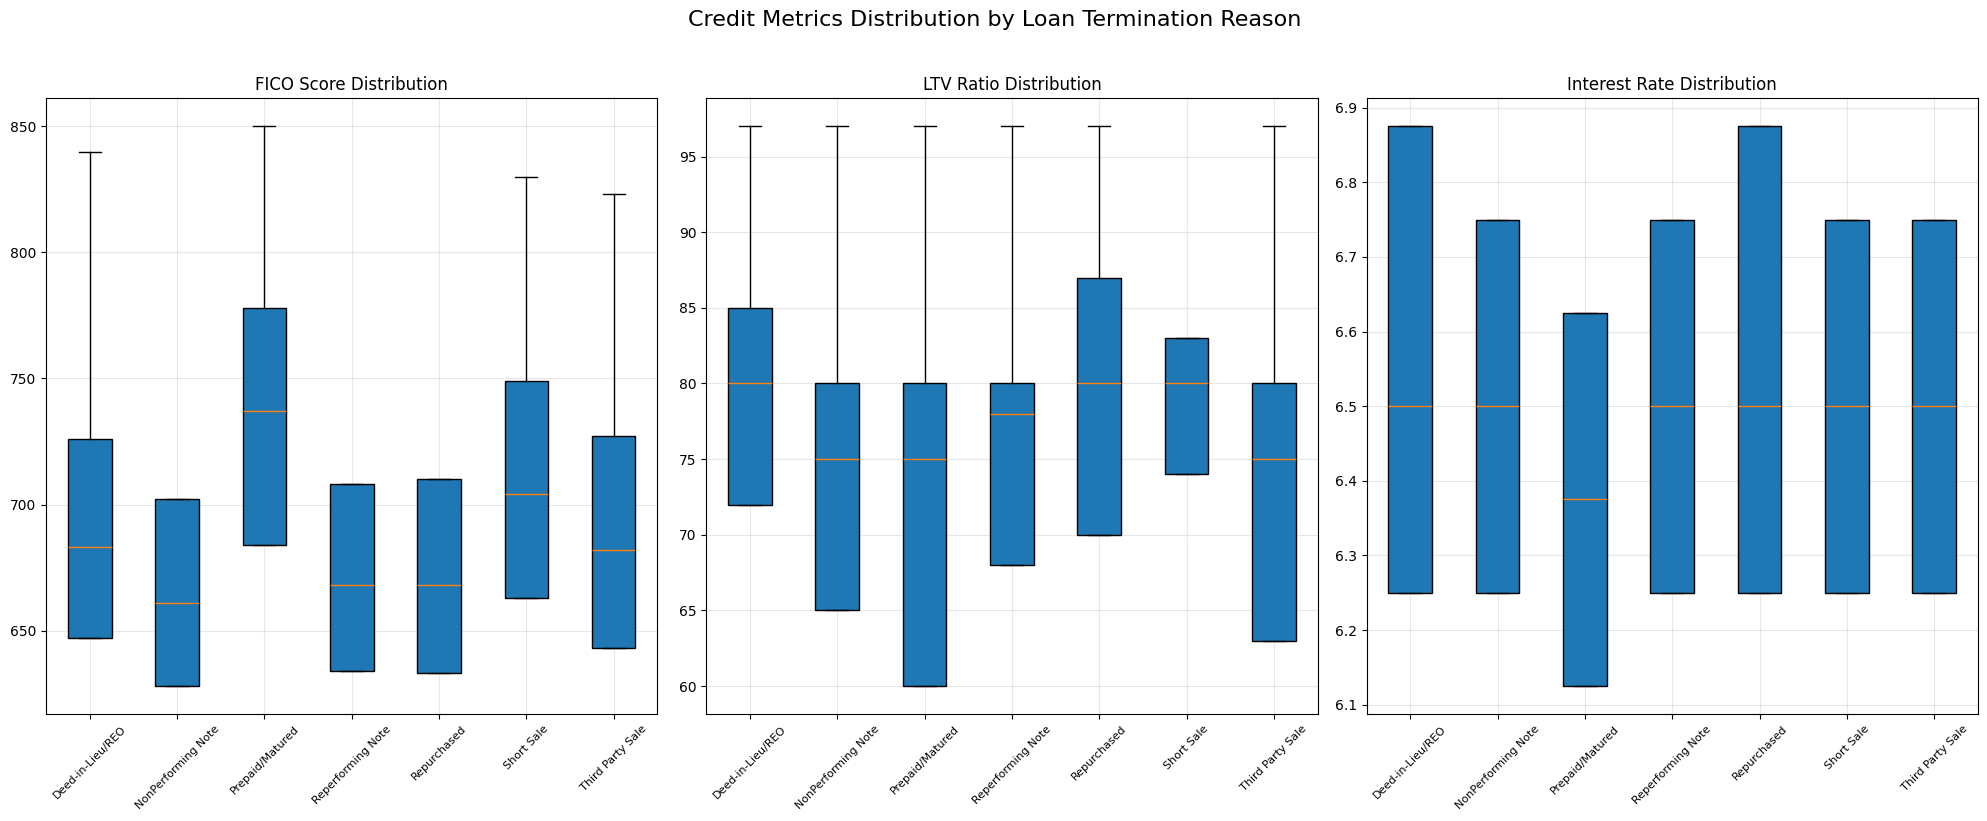

In [79]:
pdf = quantiles_df.orderBy("zbc_label").toPandas()

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
metrics = ['fico_score', 'ltv_ratio', 'interest_rate']
titles = ['FICO Score Distribution', 'LTV Ratio Distribution', 'Interest Rate Distribution']

for ax, metric, title in zip(axes, metrics, titles):
    box_data = []
    labels = []

    for _, row in pdf.iterrows():
        labels.append(row['zbc_label'])
        box_data.append([
            row[f'{metric}_min'],
            row[f'{metric}_q1'],
            row[f'{metric}_median'],
            row[f'{metric}_q3'],
            row[f'{metric}_max']
        ])

    ax.boxplot(box_data, labels=labels, showfliers=False, patch_artist=True)
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle("Credit Metrics Distribution by Loan Termination Reason", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Analysis-5..---  FICO , LTV , and Interest Rates across different loan
statuses**

**5) Distribution of FICO Scores, LTV Ratios, and Interest Rates across different loan statuses (performing, delinquent, defaulted)..**



*Find the columns and their Enumerations for the different lone status ◀*

In [82]:
df = spark.read.parquet("/content/drive/MyDrive/Big_data/parquet_3")

from pyspark.sql.functions import col, when

status_conditions = [
    ("performing", (col("DLQ_STATUS") == 0) & (col("Zero_Bal_Code").isNull())),
    ("delinquent", col("DLQ_STATUS").between(1, 6)),
    ("defaulted", col("Zero_Bal_Code").isin(["09", "15", "97", "98"]))
]

df_status = df.withColumn(
    "loan_status",
    when(status_conditions[0][1], status_conditions[0][0])
    .when(status_conditions[1][1], status_conditions[1][0])
    .when(status_conditions[2][1], status_conditions[2][0])
    .otherwise("other")
).filter(col("loan_status") != "other").na.drop()

In [84]:
print(len(status_conditions))
print(status_conditions[0][0])
print(status_conditions[1][0])

3
performing
delinquent


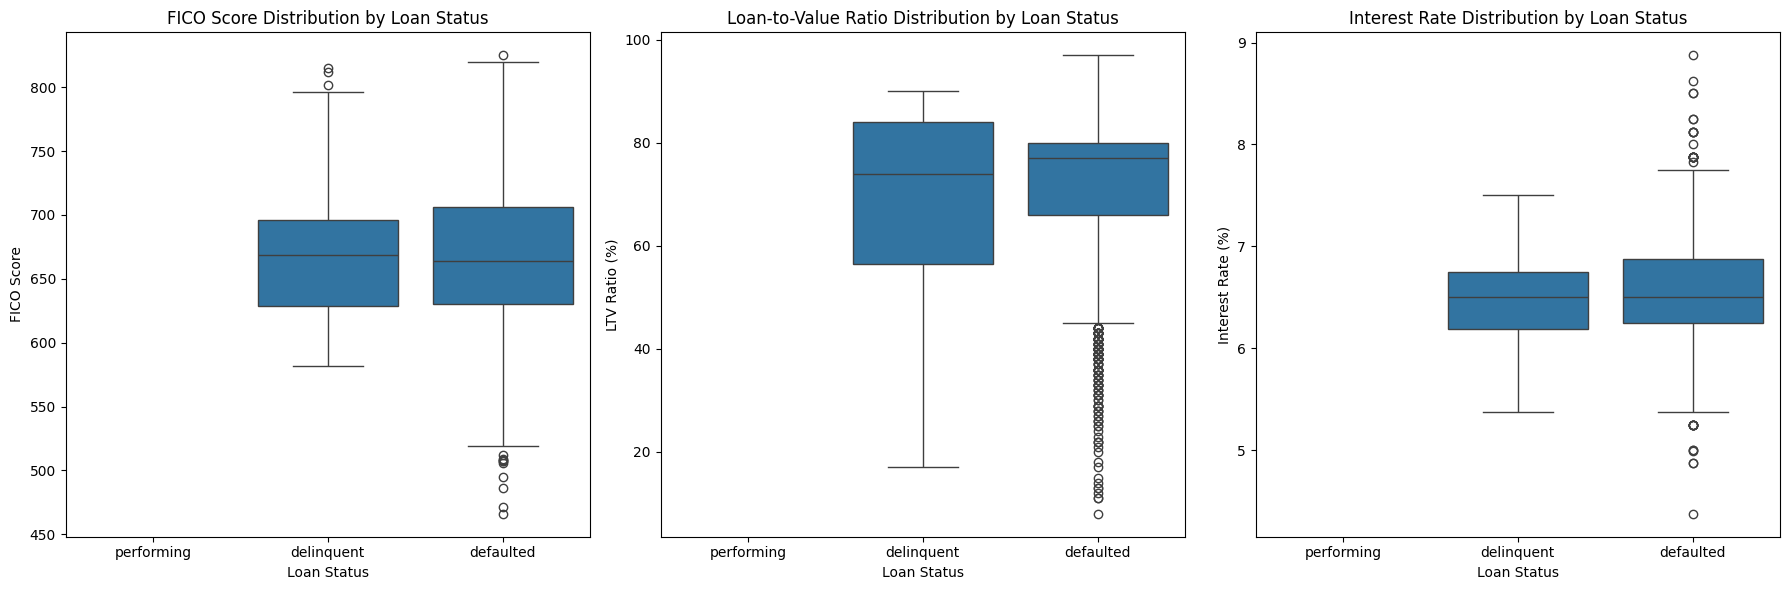

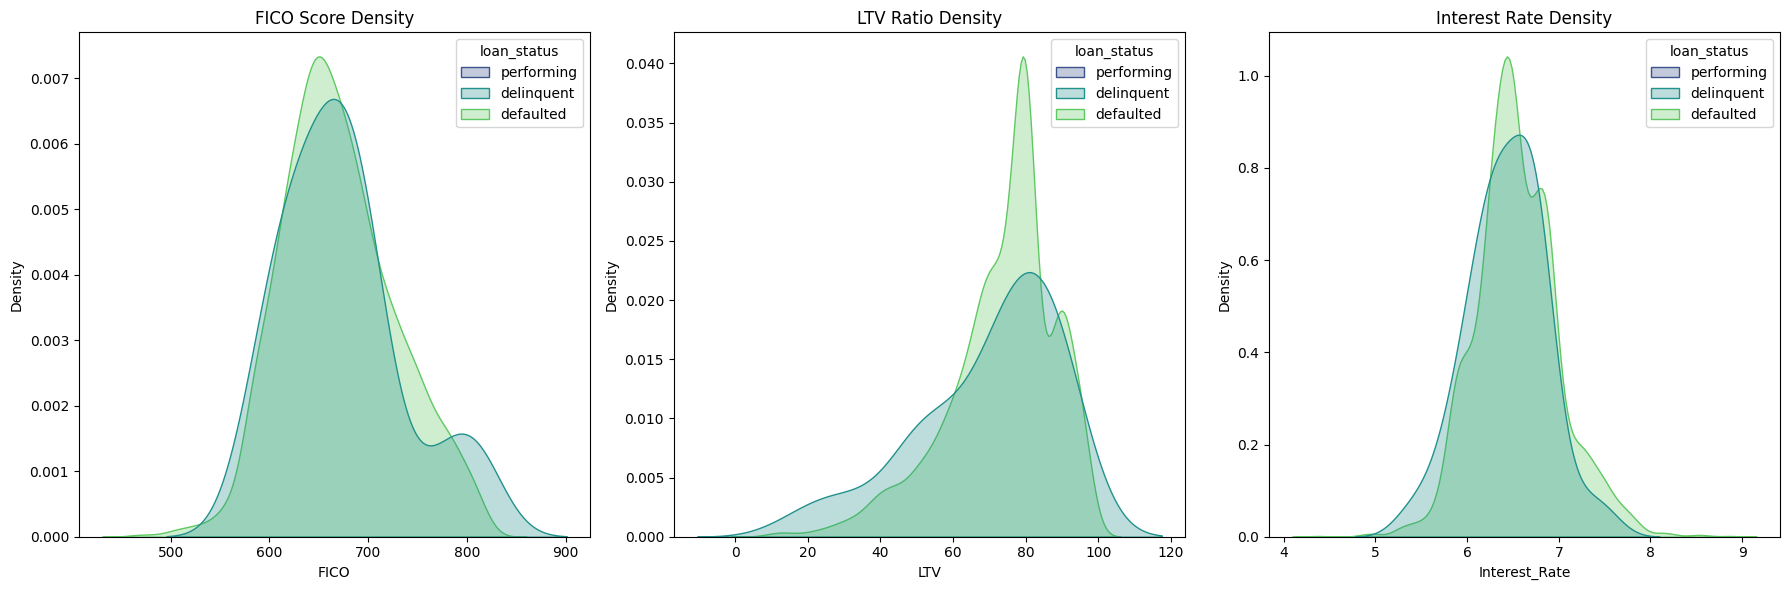

In [83]:

viz_df = df_status.select(
    "loan_status",
    col("CSCORE_B").alias("FICO"),
    col("OLTV").alias("LTV"),
    col("ORIG_RATE").alias("Interest_Rate")
).toPandas()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x="loan_status", y="FICO", data=viz_df, order=["performing", "delinquent", "defaulted"])
plt.title("FICO Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("FICO Score")

plt.subplot(1, 3, 2)
sns.boxplot(x="loan_status", y="LTV", data=viz_df, order=["performing", "delinquent", "defaulted"])
plt.title("Loan-to-Value Ratio Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("LTV Ratio (%)")

# Interest Rates
plt.subplot(1, 3, 3)
sns.boxplot(x="loan_status", y="Interest_Rate", data=viz_df, order=["performing", "delinquent", "defaulted"])
plt.title("Interest Rate Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate (%)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
metrics = ["FICO", "LTV", "Interest_Rate"]
titles = ["FICO Score Density", "LTV Ratio Density", "Interest Rate Density"]

for i, (metric, title) in enumerate(zip(metrics, titles), 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(
        data=viz_df,
        x=metric,
        hue="loan_status",
        hue_order=["performing", "delinquent", "defaulted"],
        common_norm=False,
        fill=True,
        alpha=0.3,
        palette="viridis"
    )
    plt.title(title)
    plt.xlabel(metric)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

**Analayis-6 --- Evaluating Default Risk and Comparing It Over Time**

** 6) Compare default rates for loans originated in different quarters to assess if default risk has changed over time...**

- first Filter loans by origination quarter using the Origination Date.and then find out using below columns ▶

Column Name:
- *1) Zero Balance Code or*
- *2)  Delinquency Status.*




**Understanding Each Code:**

*Looking at the full list, we can categorize them into two groups:*

**✅ Codes Representing Serious Credit Events (Defaults) Code	Meaning	Reason for Inclusion:**

- **"09" Deed-in-Lieu; REO Disposition:** This indicates a foreclosure event, which is a significant credit issue.

- **"15" Non-Performing Note Sale:** This means the loan was sold as a non-performing asset, signaling a default.

- **"97" Delinquency (D180 - 180 Days Late):** A loan that is 180 days past due is considered to be in default.

- **"98" Other Credit Event:** This category captures other serious credit issues affecting the loan.
**🚫 Codes That Are Not Defaults (Excluded)**


- **Code** : Meaning : Reason for Exclusion
"**Loan Status Descriptions:**

01. **Prepaid or Matured: (1)** The borrower has fully paid off the loan; this is not considered a default.

02. **Third Party Sale:(2)** The loan was sold to another entity; this is a financial transaction and not a credit event.

03. **Short Sale:(3)** A short sale can have negative implications, but it is often a negotiated settlement rather than an outright default.

04. **Repurchased:(06)** The loan was bought back, which does not necessarily indicate a default.

05. **Reperforming Note Sale:(16)** A previously delinquent loan is now performing again, so it is no longer considered a default.

06. **Removal (Non-Credit Event):(96)** The loan was removed from tracking, but this was not due to any credit issue.

**Summary-**

- *We only included the codes "09," "15," "97," and "98" because they directly represent serious credit events, specifically defaults.*

- *The other codes were excluded from the default codes list since they do not necessarily indicate a default.*

- *This approach ensures that when we calculate default rates, we are only considering actual credit events and not normal loan transactions.*






In [87]:
from pyspark.sql.functions import col, to_date, year, quarter, concat, lit, when, count, sum as spark_sum

default_codes = ["09", "15", "97", "98"]

analysis_df = df.filter(col("ORIG_DATE").isNotNull()).withColumn(
    "orig_date", to_date(col("ORIG_DATE"), "MMyyyy")
).withColumn(
    "orig_year", year("orig_date")
).withColumn(
    "orig_quarter", quarter("orig_date")
).withColumn(
    "year_quarter", concat(col("orig_year"), lit("-Q"), col("orig_quarter"))
).withColumn(
    "default_flag", when(col("Zero_Bal_Code").isin(default_codes), 1).otherwise(0)
).filter(col("orig_date").isNotNull())

quarterly_rates = analysis_df.groupBy("year_quarter").agg(
    count("*").alias("total_loans"),
    spark_sum("default_flag").alias("defaults")
).withColumn(
    "default_rate", (col("defaults") / col("total_loans") * 100)
).orderBy("year_quarter")


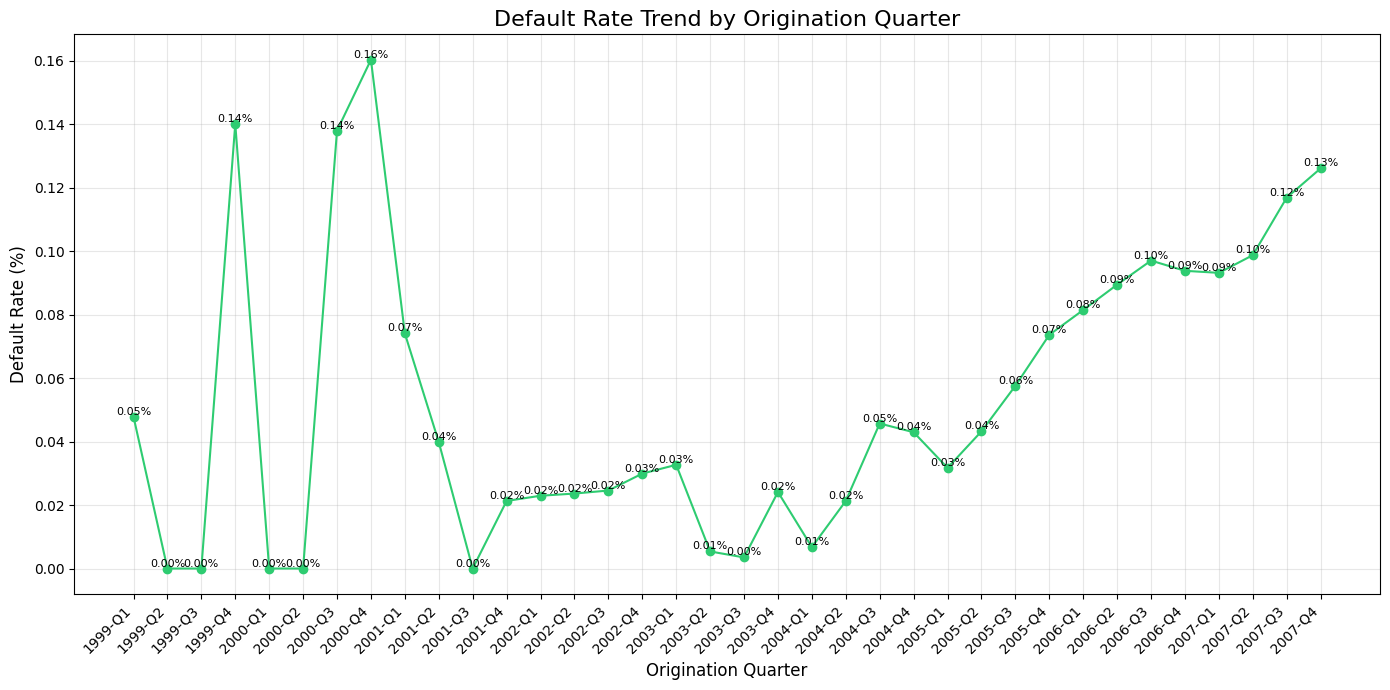

In [88]:

pdf = quarterly_rates.toPandas()

plt.figure(figsize=(14, 7))
plt.plot(pdf["year_quarter"], pdf["default_rate"], marker="o", linestyle="-", color="#2ecc71")
plt.title("Default Rate Trend by Origination Quarter", fontsize=16)
plt.xlabel("Origination Quarter", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()

for x, y in zip(pdf["year_quarter"], pdf["default_rate"]):
    plt.text(x, y, f"{y:.2f}%", ha="center", va="bottom", fontsize=8)

plt.show()

**Analysis-7 ---The percentage of the loan amount that is recovered after a default.**

**7) The percentage of the loan amount recovered after default, through foreclosure or other means...**

- **Key Columns Required....**
- Zero_Bal_Code

    Identifies loans that defaulted.
    Use codes:

    03 = Short Sale

    09 = Deed-in-Lieu/REO Disposition

    15 = Non-Performing Note Sale

    98 = Other Credit Event

- ORIG_UPB

    Original unpaid principal balance (loan amount at origination).

**Recovery Amount Columns:**

- NET_SALES_PROCEEDS (Proceeds from property sale after foreclosure).

- CREDIT_ENHANCEMENT_PROCEEDS (Insurance/third-party reimbursements).

- REPURCHASES_MAKE_WHOLE_PROCEEDS (Repurchase agreements).

- OTHER_FORECLOSURE_PROCEEDS (Additional recovery sources).



In [89]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, coalesce, lit, sum as spark_sum

# Initialize Spark session
spark = SparkSession.builder.appName("LoanRecoveryAnalysis").getOrCreate()



default_codes = ["03", "09", "15", "98"]

defaults_df = df_clean.filter(col("Zero_Bal_Code").isin(default_codes))


defaults_df = defaults_df.withColumn(
    "Total_Recovery",
    coalesce(col("NET_SALES_PROCEEDS"), lit(0)) +
    coalesce(col("CREDIT_ENHANCEMENT_PROCEEDS"), lit(0)) +
    coalesce(col("REPURCHASES_MAKE_WHOLE_PROCEEDS"), lit(0)) +
    coalesce(col("OTHER_FORECLOSURE_PROCEEDS"), lit(0))
)

defaults_df = defaults_df.withColumn(
    "Recovery_Percentage",
    when(col("ORIG_UPB") > 0, (col("Total_Recovery") / col("ORIG_UPB")) * 100).otherwise(lit(None))
)

defaults_df.select(
    "LOAN_ID",
    "Zero_Bal_Code",
    "ORIG_UPB",
    "Total_Recovery",
    "Recovery_Percentage"
).show(50, truncate=False)

aggregated = defaults_df.agg(
    spark_sum("Total_Recovery").alias("Total_Recovery_Sum"),
    spark_sum("ORIG_UPB").alias("Total_Orig_UPB")
).withColumn(
    "Overall_Recovery_Percentage",
    when(col("Total_Orig_UPB") > 0, (col("Total_Recovery_Sum") / col("Total_Orig_UPB")) * 100).otherwise(lit(None))
)

print("Overall Recovery Percentage for Defaulted Loans:")
aggregated.show(truncate=False)


+------------+-------------+--------+------------------+-------------------+
|LOAN_ID     |Zero_Bal_Code|ORIG_UPB|Total_Recovery    |Recovery_Percentage|
+------------+-------------+--------+------------------+-------------------+
|570910452822|15           |205000.0|197485.03         |96.33416097560975  |
|570993966727|09           |147000.0|83966.47          |57.12004761904762  |
|571086617786|09           |245000.0|123449.42         |50.38751836734694  |
|571121452106|03           |171000.0|134326.16         |78.55330994152047  |
|571155412186|09           |43000.0 |18958.81          |44.09025581395349  |
|571163126989|09           |55000.0 |38023.26          |69.1332            |
|571249334533|03           |307000.0|276606.82         |90.09994136807818  |
|571316221678|09           |119000.0|68275.42          |57.3743025210084   |
|571333751674|03           |204000.0|149350.14         |73.21085294117647  |
|571440029951|03           |220000.0|160005.62         |72.72982727272726  |

In [99]:
from pyspark.sql.functions import col, when, coalesce, lit, count, sum as spark_sum

df = spark.read.parquet("/content/drive/MyDrive/Big_data/parquet_3")

default_codes = ["03", "09", "15", "98"]
recovery_cols = [
    "NET_SALES_PROCEEDS",
    "CREDIT_ENHANCEMENT_PROCEEDS",
    "REPURCHASES_MAKE_WHOLE_PROCEEDS",
    "OTHER_FORECLOSURE_PROCEEDS"
]

recovery_df = df.filter(col("Zero_Bal_Code").isin(default_codes)).withColumn(
    "total_recovery",
    coalesce(col(recovery_cols[0]), lit(0)) +
    coalesce(col(recovery_cols[1]), lit(0)) +
    coalesce(col(recovery_cols[2]), lit(0)) +
    coalesce(col(recovery_cols[3]), lit(0))
).withColumn(
    "recovery_pct",
    when(col("ORIG_UPB") > 0, (col("total_recovery") / col("ORIG_UPB") * 100)).otherwise(lit(0))
).select(
    "Zero_Bal_Code",
    "ORIG_UPB",
    "total_recovery",
    "recovery_pct"
)

recovery_stats = recovery_df.groupBy("Zero_Bal_Code").agg(
    spark_sum("ORIG_UPB").alias("total_orig_upb"),
    spark_sum("total_recovery").alias("total_recovered"),
    spark_sum(when(col("recovery_pct") >= 100, lit(1)).otherwise(lit(0))).alias("full_recoveries"),
    count("*").alias("total_defaults")
).withColumn(
    "overall_recovery_rate", (col("total_recovered") / col("total_orig_upb") * 100)
).orderBy("Zero_Bal_Code")


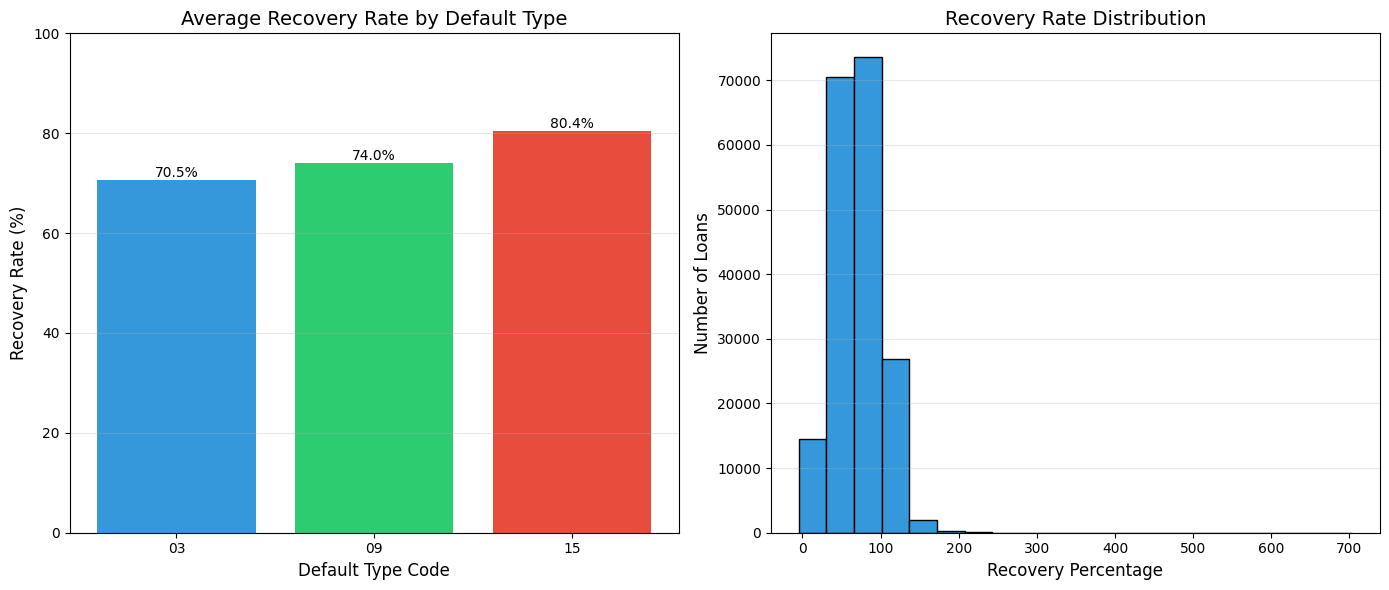

In [101]:
pdf = recovery_stats.toPandas()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(pdf["Zero_Bal_Code"], pdf["overall_recovery_rate"], color=["#3498db", "#2ecc71", "#e74c3c", "#9b59b6"])
plt.title("Average Recovery Rate by Default Type", fontsize=14)
plt.xlabel("Default Type Code", fontsize=12)
plt.ylabel("Recovery Rate (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.subplot(1, 2, 2)
recovery_pct_pdf = recovery_df.select("recovery_pct").toPandas()
plt.hist(recovery_pct_pdf["recovery_pct"], bins=20, color="#3498db", edgecolor="black")
plt.title("Recovery Rate Distribution", fontsize=14)
plt.xlabel("Recovery Percentage", fontsize=12)
plt.ylabel("Number of Loans", fontsize=12)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()



In [102]:
print("Key Recovery Metrics:")
print(pdf)

Key Recovery Metrics:
  Zero_Bal_Code  total_orig_upb  total_recovered  full_recoveries  \
0            03    1.062821e+10     7.497358e+09             4985   
1            09    2.345640e+10     1.735203e+10            24191   
2            15    2.159598e+09     1.736459e+09             1900   

   total_defaults  overall_recovery_rate  
0           45649              70.542068  
1          131122              73.975666  
2           11029              80.406579  


**Analysis -8 property price changes over the duration**

**8) Plot average, median, and variance of property price changes over the entire duration, bucketed by month.....**


 *To plot the average, median, and variance of property price changes over time (bucketed by month)*

- **Key Columns Required**

- *ACT_PERIOD: Activity period (month/year of the record).*

- *ORIG_UPB: We will use the original unpaid principal balance (loan amount) as a proxy, representing the original loan balance.*

- *OLTV: Original loan-to-value ratio (to calculate original property value).*

- *CURRENT_LIST_PRICE: Current listing price of the property (monthly snapshot*


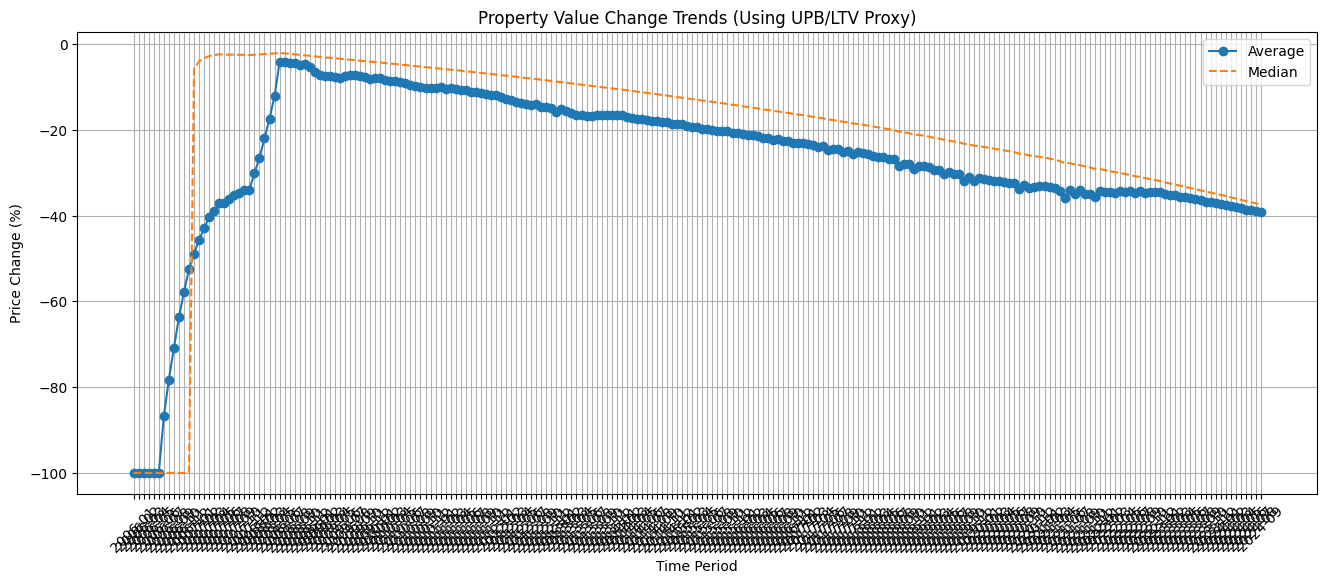

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, avg, variance, percentile_approx, length, coalesce
from pyspark.sql.types import DoubleType
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("PropertyPriceAnalysis").getOrCreate()
df = spark.read.parquet("/content/drive/MyDrive/Big_data/combined.parquet")

required_cols = ["ACT_PERIOD", "ORIG_UPB", "OLTV", "ORIG_RATE", "CURRENT_UPB"]
df = df.select(required_cols).filter(
    (col("OLTV") > 0) &
    (col("ORIG_UPB").isNotNull()) &
    (col("CURRENT_UPB").isNotNull())
)

df = df.withColumn("orig_property_value", col("ORIG_UPB") / (col("OLTV")/100))
df = df.withColumn("current_property_value", col("CURRENT_UPB") / (col("OLTV")/100))
df = df.withColumn("price_change_pct",
                  ((col("current_property_value") - col("orig_property_value"))
                   / col("orig_property_value") * 100))

df = df.withColumn("month", expr("substring(ACT_PERIOD, 1, 2)").cast("int"))
df = df.withColumn("year", expr("substring(ACT_PERIOD, 3, 4)").cast("int"))


monthly_stats = df.groupBy("year", "month").agg(
    avg("price_change_pct").alias("avg_price_change"),
    percentile_approx("price_change_pct", 0.5).alias("median_price_change"),
    variance("price_change_pct").alias("price_variance"),
    count("*").alias("sample_size")
).filter(col("sample_size") > 100)

pdf = monthly_stats.orderBy("year", "month").toPandas()
pdf["period"] = pdf["year"].astype(str) + "-" + pdf["month"].astype(str).str.zfill(2)

plt.figure(figsize=(16, 6))
plt.plot(pdf["period"], pdf["avg_price_change"], label="Average", marker="o")
plt.plot(pdf["period"], pdf["median_price_change"], label="Median", linestyle="--")
plt.title("Property Value Change Trends (Using UPB/LTV Proxy)")
plt.xlabel("Time Period")
plt.ylabel("Price Change (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [21]:
print(" .......")

 .......


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


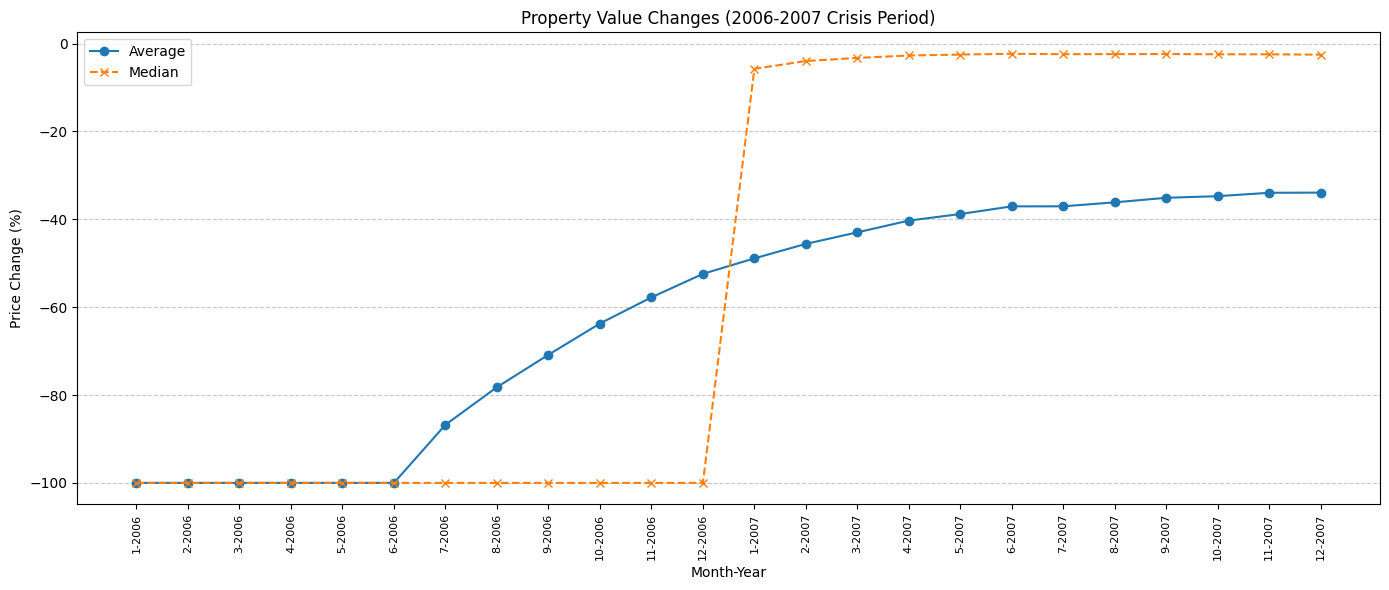

In [4]:
from google.colab import drive
drive.mount('/content/drive')

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, avg, variance, percentile_approx, count
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("2006-2007 Price Analysis").getOrCreate()
df = spark.read.parquet("/content/drive/MyDrive/Big_data/parquet_3")

required_cols = ["ACT_PERIOD", "ORIG_UPB", "OLTV", "CURRENT_UPB"]
df = df.select(required_cols).filter(
    (col("OLTV") > 0) &
    (col("ORIG_UPB").isNotNull()) &
    (col("CURRENT_UPB").isNotNull())
)

df = df.withColumn("orig_property_value", col("ORIG_UPB") / (col("OLTV") / 100))
df = df.withColumn("current_property_value", col("CURRENT_UPB") / (col("OLTV") / 100))
df = df.withColumn("price_change_pct",
                   ((col("current_property_value") - col("orig_property_value")) / col("orig_property_value") * 100)
)

df = df.withColumn("month", expr("substring(ACT_PERIOD, 1, 2)").cast("int"))
df = df.withColumn("year", expr("substring(ACT_PERIOD, 3, 4)").cast("int"))

df = df.filter((col("year") == 2006) | (col("year") == 2007))

monthly_stats = df.groupBy("year", "month").agg(
    avg("price_change_pct").alias("avg_price_change"),
    percentile_approx("price_change_pct", 0.5).alias("median_price_change"),
    variance("price_change_pct").alias("price_variance"),
    count("*").alias("sample_size")
).filter(col("sample_size") > 100)

pdf = monthly_stats.orderBy("year", "month").toPandas()
pdf["period"] = pdf["month"].astype(str) + "-" + pdf["year"].astype(str)  # Format: "MM-YYYY"

plt.figure(figsize=(14, 6))
plt.plot(pdf["period"], pdf["avg_price_change"], label="Average", marker="o", linestyle="-")
plt.plot(pdf["period"], pdf["median_price_change"], label="Median", marker="x", linestyle="--")

plt.title("Property Value Changes (2006-2007 Crisis Period)")
plt.xlabel("Month-Year")
plt.ylabel("Price Change (%)")
plt.xticks(rotation=90, fontsize=8)  # Rotate for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()  # Prevent label cutoff
plt.show()


In [20]:
print("project - Lone performance\nname  - Fulsundar Vishal\n Big Data")

project - Lone performance
name  - Fulsundar Vishal
 Big Data


In [14]:
print(" Project complete")

 Project complete
